In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4436 - accuracy: 0.8393 - val_loss: 0.3537 - val_accuracy: 0.8669
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3009 - accuracy: 0.8902 - val_loss: 0.2988 - val_accuracy: 0.8937
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2554 - accuracy: 0.9061 - val_loss: 0.2829 - val_accuracy: 0.8964
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2232 - accuracy: 0.9173 - val_loss: 0.2865 - val_accuracy: 0.9003
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2671 - accuracy: 0.9040
Test Accuracy: 0.9039999842643738


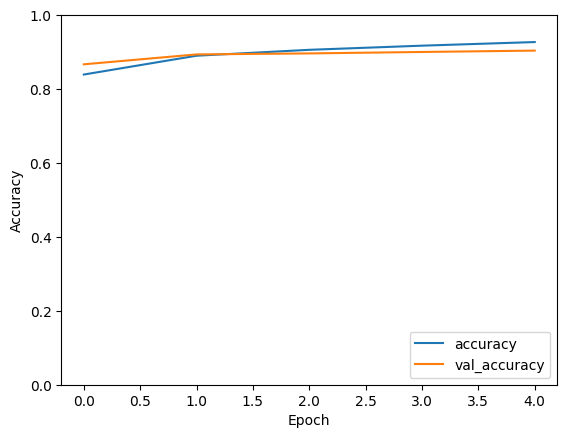

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 6s 18ms/step


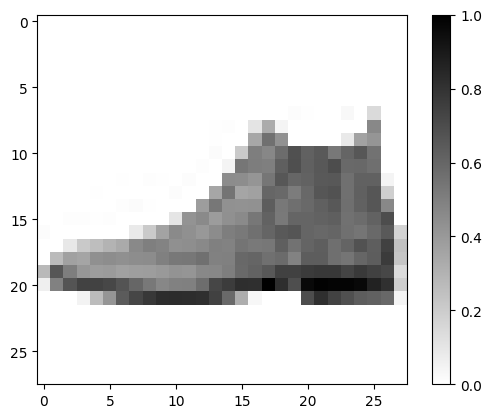

In [11]:
predictions = model.predict(test_images)

# Plot one example prediction
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
# Display prediction result
print("Predicted class:", class_names[np.argmax(predictions[0])])
print("True class:", class_names[test_labels[0]])

Predicted class: Ankle boot
True class: Ankle boot


313/313 [==============================] - 2s 7ms/step


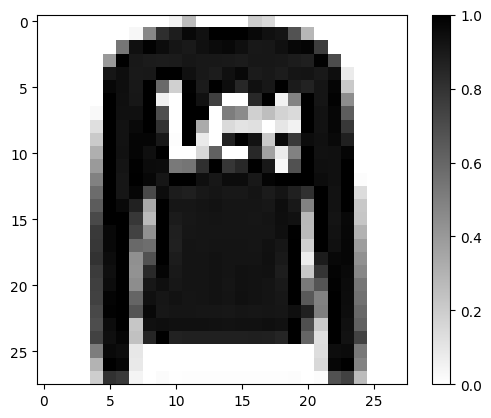

In [14]:
predictions = model.predict(test_images)

# Plot one example prediction
plt.figure()
plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


In [15]:
# Display prediction result
print("Predicted class:", class_names[np.argmax(predictions[1])])
print("True class:", class_names[test_labels[1]])

Predicted class: Pullover
True class: Pullover
